# Multi-line temperature profile plot

In [1]:
import matplotlib.pyplot as plt

import iris
import iris.plot as iplt
import iris.quickplot as qplt


In [2]:
import iris
filename = iris.sample_data_path('air_temp.pp')

Load exactly one cube from the given file.

In [3]:
temperature = iris.load_cube(filename)

We only want a small number of latitudes, so filter some out using `extract`.

In [4]:
temperature = temperature.extract(
    iris.Constraint(latitude=lambda cell: 68 <= cell < 78))

Import matplotlib and set the default figure size to be larger

In [5]:
%matplotlib inline
import iris.quickplot as qplt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12, 5]

Plot the temperatures on top of each other, with a label

We save the active figure and axes in two variables, so we can re-use it in the next cell. If we don't do that, we'll end up with an empty figure in the next cell.

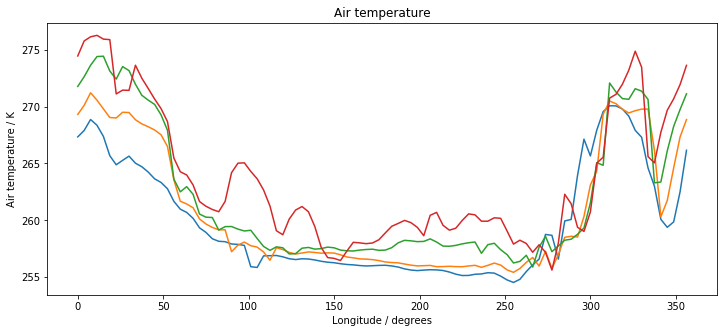

In [6]:
for cube in temperature.slices('longitude'):
    label = 'latitude: {}'.format(cube.coord('latitude').points[0])
    qplt.plot(cube, label=label)
ax = plt.gca()
figure = plt.gcf()

Add a legend with two columns, provide a grid, and tell matplotlib to not extend the plot axes range to nicely rounded numbers

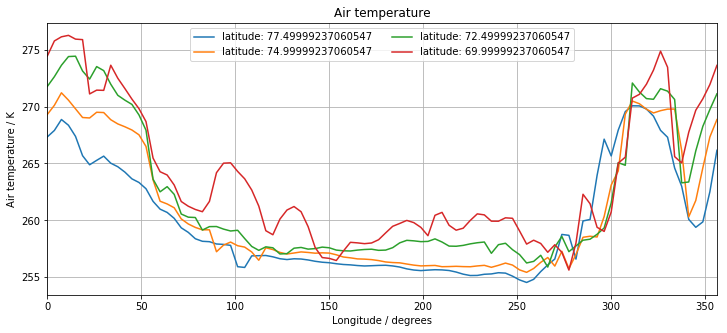

In [7]:
ax.legend(ncol=2)
ax.grid(True)
ax.autoscale(enable=True, axis='x', tight=True)

figure